# 3. Document Classification Based on BOW


## 1. Preparing the 20 Newsgroups Data and Feature Extraction

 http://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

In [ ]:
from sklearn.datasets import fetch_20newsgroups

# Create a list of topics to select from the 20 categories
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

# Fetch the training dataset
newsgroups_train = fetch_20newsgroups(subset='train',
# Remove hinting parts from the email content - classify purely based on content
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

# Fetch the test dataset
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

print('#Train set size:', len(newsgroups_train.data))
print('#Test set size:', len(newsgroups_test.data))
print('#Selected categories:', newsgroups_train.target_names)
print('#Train labels:', set(newsgroups_train.target))

#Train set size: 2034
#Test set size: 1353
#Selected categories: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
#Train labels: {0, 1, 2, 3}


In [ ]:
print('#Train set text samples:', newsgroups_train.data[0])
print('#Train set label smaples:', newsgroups_train.target[0])
print('#Test set text samples:', newsgroups_test.data[0])
print('#Test set label smaples:', newsgroups_test.target[0])

#Train set text samples: Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
#Train set label smaples: 1
#Test set text samples: TRry the SKywatch project in  Arizona.
#Test set label smaples: 2


- The training data and evaluation data each contain the content of the document and the label (topic) in .data and .target, respectively.
- 카테고리와 라벨을 들여다보면, 카테고리는 문자열로 된 원래의 값이지만 라벨은 이를 숫자로 변경한 것을 볼 수 있다.
- 순서가 동일하므로 나중에 숫자로 된 라벨을 예측하더라도 그것이 의미하는 원래 카테고리가 무엇인지 알 수 있다.

In [ ]:
X_train = newsgroups_train.data   # Training dataset documents
y_train = newsgroups_train.target # Training dataset labels

X_test = newsgroups_test.data     # Test dataset documents
y_test = newsgroups_test.target   # Test dataset labels

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2000, min_df=5, max_df=0.5)

X_train_cv = cv.fit_transform(X_train) # Transform the training set
print('Train set dimension:', X_train_cv.shape)
X_test_cv = cv.transform(X_test) # Transform the test set
print('Test set dimension:', X_test_cv.shape)

Train set dimension: (2034, 2000)
Test set dimension: (1353, 2000)


In [ ]:
for word, count in zip(cv.get_feature_names_out()[:100], X_train_cv[0].toarray()[0, :100]):
    print(word, ':', count, end=', ')

00 : 0, 000 : 0, 01 : 0, 04 : 0, 05 : 0, 10 : 0, 100 : 0, 1000 : 0, 11 : 0, 12 : 0, 128 : 0, 129 : 0, 13 : 0, 130 : 0, 14 : 0, 15 : 0, 16 : 0, 17 : 0, 18 : 0, 19 : 0, 1987 : 0, 1988 : 0, 1989 : 0, 1990 : 0, 1991 : 0, 1992 : 0, 1993 : 0, 20 : 0, 200 : 0, 202 : 0, 21 : 0, 22 : 0, 23 : 0, 24 : 0, 25 : 0, 256 : 0, 26 : 0, 27 : 0, 28 : 0, 2d : 0, 30 : 0, 300 : 0, 31 : 0, 32 : 0, 33 : 0, 34 : 0, 35 : 0, 39 : 0, 3d : 0, 40 : 0, 400 : 0, 42 : 0, 45 : 0, 50 : 0, 500 : 0, 60 : 0, 600 : 0, 65 : 0, 70 : 0, 75 : 0, 80 : 0, 800 : 0, 90 : 0, 900 : 0, 91 : 0, 92 : 0, 93 : 0, 95 : 0, _the : 0, ability : 0, able : 1, abortion : 0, about : 1, above : 0, absolute : 0, absolutely : 0, ac : 0, accept : 0, acceptable : 0, accepted : 0, access : 0, according : 0, account : 0, accurate : 0, across : 0, act : 0, action : 0, actions : 0, active : 0, activities : 0, activity : 0, acts : 0, actual : 0, actually : 0, ad : 0, add : 0, added : 0, addition : 0, additional : 0, address : 0, 

## 2. Understanding Machine Learning and Document Classification Process


## 3. Document Classification Using Naive Bayes Classifier

1. http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [ ]:
from sklearn.naive_bayes import MultinomialNB  # Using the MultinomialNB provided by sklearn
NB_clf = MultinomialNB()  # Declare the classifier

NB_clf.fit(X_train_cv, y_train)  # Train the classifier using the training set

print('Train set score: {:.3f}'.format(NB_clf.score(X_train_cv, y_train)))  # Check the prediction accuracy on the training set
print('Test set score: {:.3f}'.format(NB_clf.score(X_test_cv, y_test)))  # Check the prediction accuracy on the test set

Train set score: 0.824
Test set score: 0.732


In [ ]:
print('#First document and label in test data:', X_test[0], y_test[0])
print('#Second document and label in test data:', X_test[1], y_test[1])

pred = NB_clf.predict(X_test_cv[:2])

print('#Predicted labels:', pred)
print('#Predicted categories:', newsgroups_train.target_names[pred[0]], newsgroups_train.target_names[pred[1]])

#First document and label in test data: TRry the SKywatch project in  Arizona. 2
#Second document and label in test data: The Vatican library recently made a tour of the US.
 Can anyone help me in finding a FTP site where this collection is 
 available. 1
#Predicted labels: [2 1]
#Predicted categories: sci.space comp.graphics


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Using the same parameters as CountVectorizer
tfidf = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.5)
X_train_tfidf = tfidf.fit_transform(X_train)  # Transform the training set
X_test_tfidf = tfidf.transform(X_test)  # Transform the test set

NB_clf.fit(X_train_tfidf, y_train)  # Retrain the classifier using the TF-IDF transformed training set
print('Train set score: {:.3f}'.format(NB_clf.score(X_train_tfidf, y_train)))  # Check the prediction accuracy on the training set
print('Test set score: {:.3f}'.format(NB_clf.score(X_test_tfidf, y_test)))  # Check the prediction accuracy on the test set

Train set score: 0.862
Test set score: 0.741


In [ ]:
import numpy as np

def top10_features(classifier, vectorizer, categories):
    feature_names = np.array(vectorizer.get_feature_names_out())

    for i, category in enumerate(categories):
        # Sort in descending order of the log probabilities
        top10 = np.argsort(-classifier.feature_log_prob_[i])[:10]
        # Print the category and the top 10 most influential features
        print("%s: %s" % (category, ", ".join(feature_names[top10])))

top10_features(NB_clf, tfidf, newsgroups_train.target_names)

alt.atheism: you, not, are, be, this, have, as, what, they, if
comp.graphics: you, on, graphics, this, have, any, can, or, with, thanks
sci.space: space, on, you, be, was, this, as, they, have, are
talk.religion.misc: you, not, he, are, as, this, be, god, was, they


## 4. Document Classification Using Logistic Regression

1: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
from sklearn.linear_model import LogisticRegression  # Using logistic regression provided by sklearn

# Perform regression on the count vector and compare with Naive Bayes
LR_clf = LogisticRegression()  # Declare the classifier
LR_clf.fit(X_train_tfidf, y_train)  # Train the classifier using the training data
print('Train set score: {:.3f}'.format(LR_clf.score(X_train_tfidf, y_train)))  # Prediction accuracy on the training data
print('Test set score: {:.3f}'.format(LR_clf.score(X_test_tfidf, y_test)))  # Prediction accuracy on the test data

Train set score: 0.929
Test set score: 0.735


### Ridge Regression


In [ ]:
from sklearn.linear_model import RidgeClassifier

ridge_clf = RidgeClassifier()  # Declare the Ridge classifier
ridge_clf.fit(X_train_tfidf, y_train)  # Train the model
print('Train set score: {:.3f}'.format(ridge_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test_tfidf, y_test)))

Train set score: 0.960
Test set score: 0.735


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train_ridge, X_val_ridge, y_train_ridge, y_val_ridge = train_test_split(
    X_train_tfidf, y_train, test_size=0.2, random_state=42)

max_score = 0
max_alpha = 0
for alpha in np.arange(0.1, 10, 0.1):  # Increase alpha from 0.1 to 10 in increments of 0.1
    ridge_clf = RidgeClassifier(alpha=alpha)  # Declare the Ridge classifier
    ridge_clf.fit(X_train_ridge, y_train_ridge)  # Train the model
    score = ridge_clf.score(X_val_ridge, y_val_ridge)  # Measure accuracy on the validation dataset
    if score > max_score:  # If accuracy is greater than the previous maximum accuracy, update max score and alpha
        max_score = score
        max_alpha = alpha
print('Max alpha {:.3f} at max validation score {:.3f}'.format(max_alpha, max_score))

Max alpha 1.600 at max validation score 0.826


In [ ]:
ridge_clf = RidgeClassifier(alpha=1.6)  # Declare the Ridge classifier
ridge_clf.fit(X_train_tfidf, y_train)  # Train the model

print('Train set score: {:.3f}'.format(ridge_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test_tfidf, y_test)))

Train set score: 0.947
Test set score: 0.739


In [ ]:
def top10_features(classifier, vectorizer, categories):
    feature_names = vectorizer.get_feature_names_out()
    for i, category in enumerate(categories):
        # Extract the top 10 important feature indices from the coefficients (coef_)
        top10 = np.argsort(classifier.coef_[i])[-10:]  # Features with the largest coefficients
        # Print the corresponding feature names
        print("%s: %s" % (category, ", ".join(feature_names[top10])))

# Call the top10_features function
top10_features(ridge_clf, tfidf, newsgroups_train.target_names)

alt.atheism: satan, islamic, deletion, islam, punishment, motto, atheists, atheism, religion, bobby
comp.graphics: looking, screen, using, 42, hi, image, file, 3d, computer, graphics
sci.space: idea, funding, flight, launch, sci, moon, spacecraft, nasa, orbit, space
talk.religion.misc: hudson, christ, children, objective, jesus, order, blood, fbi, christians, christian


### Feature Selection Using Lasso Regression
1. http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [ ]:
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear', C=1)  # Lasso is applied using LogisticRegression with specific parameters
lasso_clf.fit(X_train_tfidf, y_train)  # Train the model with the training data

print('#Train set score: {:.3f}'.format(lasso_clf.score(X_train_tfidf, y_train)))
print('#Test set score: {:.3f}'.format(lasso_clf.score(X_test_tfidf, y_test)))

# Output the number of non-zero coefficients
print('#Used features count: {}'.format(np.sum(lasso_clf.coef_ != 0)), 'out of', X_train_tfidf.shape[1])

#Train set score: 0.819
#Test set score: 0.724
#Used features count: 437 out of 2000


In [ ]:
top10_features(lasso_clf, tfidf, newsgroups_train.target_names)

alt.atheism: vice, satan, atheist, motto, islamic, religion, islam, atheists, atheism, bobby
comp.graphics: sphere, looking, files, video, hi, computer, file, 3d, image, graphics
sci.space: solar, shuttle, dc, moon, flight, spacecraft, nasa, launch, orbit, space
talk.religion.misc: blood, context, objective, children, jesus, order, christ, christians, christian, fbi


## 5. Other Document Classification Methods Using Decision Trees and More

1. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

tree = DecisionTreeClassifier(random_state=7)
tree.fit(X_train_tfidf, y_train)
print('#Decision Tree train set score: {:.3f}'.format(tree.score(X_train_tfidf, y_train)))
print('#Decision Tree test set score: {:.3f}'.format(tree.score(X_test_tfidf, y_test)))

forest = RandomForestClassifier(random_state=7)
forest.fit(X_train_tfidf, y_train)
print('#Random Forest train set score: {:.3f}'.format(forest.score(X_train_tfidf, y_train)))
print('#Random Forest test set score: {:.3f}'.format(forest.score(X_test_tfidf, y_test)))

gb = GradientBoostingClassifier(random_state=7)
gb.fit(X_train_tfidf, y_train)
print('#Gradient Boosting train set score: {:.3f}'.format(gb.score(X_train_tfidf, y_train)))
print('#Gradient Boosting test set score: {:.3f}'.format(gb.score(X_test_tfidf, y_test)))

#Decision Tree train set score: 0.977
#Decision Tree test set score: 0.536
#Random Forest train set score: 0.977
#Random Forest test set score: 0.685
#Gradient Boosting train set score: 0.933
#Gradient Boosting test set score: 0.695


In [ ]:
sorted_feature_importances = sorted(zip(tfidf.get_feature_names_out(), gb.feature_importances_), key=lambda x: x[1], reverse=True)
for feature, value in sorted_feature_importances[:40]:
    print('%s: %.3f' % (feature, value), end=', ')

space: 0.126, graphics: 0.080, atheism: 0.024, thanks: 0.023, file: 0.021, orbit: 0.020, jesus: 0.018, god: 0.018, hi: 0.017, nasa: 0.015, image: 0.015, files: 0.014, christ: 0.010, moon: 0.010, bobby: 0.010, launch: 0.010, looking: 0.010, christian: 0.010, atheists: 0.009, christians: 0.009, fbi: 0.009, 3d: 0.008, you: 0.008, not: 0.008, religion: 0.007, islamic: 0.007, spacecraft: 0.007, flight: 0.007, computer: 0.007, islam: 0.007, ftp: 0.006, color: 0.006, software: 0.005, atheist: 0.005, card: 0.005, people: 0.005, koresh: 0.005, his: 0.005, kent: 0.004, sphere: 0.004, 

## 6. Methods to Improve Performance



In [ ]:
# Import necessary libraries
from nltk.corpus import stopwords
nltk.download('stopwords')
cachedStopWords = stopwords.words("english")

from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import re

RegTok = RegexpTokenizer("[\w']{3,}")  # Define tokenizer using regular expressions
english_stops = set(stopwords.words('english'))  # Load English stopwords

def tokenizer(text):
    tokens = RegTok.tokenize(text.lower())  # Tokenize the text in lowercase
    # Exclude stopwords
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2]
    # Apply Porter Stemmer
    features = (list(map(lambda token: PorterStemmer().stem(token), words)))
    return features

tfidf = TfidfVectorizer(tokenizer=tokenizer, max_features=2000, min_df=5, max_df=0.5)  # Use newly defined tokenizer
X_train_tfidf = tfidf.fit_transform(X_train)  # Transform the training set
X_test_tfidf = tfidf.transform(X_test)  # Transform the test set

# Train the classifier using the tfidf vector
LR_clf = LogisticRegression()  # Declare the classifier
LR_clf.fit(X_train_tfidf, y_train)  # Train the classifier using the training data
print('#Train set score: {:.3f}'.format(LR_clf.score(X_train_tfidf, y_train)))  # Prediction accuracy on the training data
print('#Test set score: {:.3f}'.format(LR_clf.score(X_test_tfidf, y_test)))  # Prediction accuracy on the test data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


#Train set score: 0.931
#Test set score: 0.750


In [ ]:
len(LR_clf.coef_[0])

2000

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=tokenizer)

X_train_tfidf = tfidf.fit_transform(X_train)  # Transform the training set
print('#Train set dimension:', X_train_tfidf.shape)  # Check how many features are used
X_test_tfidf = tfidf.transform(X_test)  # Transform the test set
print('#Test set dimension:', X_test_tfidf.shape)

ridge_clf = RidgeClassifier(alpha=2.4)
ridge_clf.fit(X_train_tfidf, y_train)  # Train the model
print('#Train set score: {:.3f}'.format(ridge_clf.score(X_train_tfidf, y_train)))
print('#Test set score: {:.3f}'.format(ridge_clf.score(X_test_tfidf, y_test)))

NB_clf = MultinomialNB(alpha=0.01)  # Declare the classifier
NB_clf.fit(X_train_tfidf, y_train)  # Train the classifier using the training set
print('#Train set score: {:.3f}'.format(NB_clf.score(X_train_tfidf, y_train)))  # Check the prediction accuracy on the training set
print('#Test set score: {:.3f}'.format(NB_clf.score(X_test_tfidf, y_test)))  # Check the prediction accuracy on the test set

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


#Train set dimension: (2034, 20085)
#Test set dimension: (1353, 20085)
#Train set score: 0.969
#Test set score: 0.768
#Train set score: 0.971
#Test set score: 0.793


## 7. Issues with Count-Based Methods and N-gram


In [ ]:
cachedStopWords = stopwords.words("english")
tfidf = TfidfVectorizer(token_pattern="[a-zA-Z']{3,}",  # Regular expression for tokenization
                        decode_error='ignore',
                        lowercase=True,
                        stop_words=stopwords.words('english'),
                        max_df=0.5,
                        min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(X_train_tfidf.shape)

(2034, 11483)


In [ ]:
from sklearn.linear_model import RidgeClassifier
ridge_clf = RidgeClassifier()  # Declare the Ridge classifier
ridge_clf.fit(X_train_tfidf, y_train)  # Train the model
print('Train set score: {:.3f}'.format(ridge_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test_tfidf, y_test)))

Train set score: 0.976
Test set score: 0.765


In [ ]:
tfidf = TfidfVectorizer(token_pattern="[a-zA-Z']{3,}",
                        decode_error='ignore',
                        lowercase=True,
                        stop_words=stopwords.words('english'),
                        ngram_range=(1, 2),  # Set to bigrams
                        max_df=0.5,
                        min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(X_train_tfidf.shape)

(2034, 26550)


In [ ]:
bigram_features = [f for f in tfidf.get_feature_names_out() if len(f.split()) > 1]
print('bi-gram samples:', bigram_features[:10])

ridge_clf.fit(X_train_tfidf, y_train) # Training
print('Train set score: {:.3f}'.format(ridge_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test_tfidf, y_test)))

bi-gram samples: ["'cause can't", "'em better", "'expected errors'", "'karla' next", "'nodis' password", "'official doctrine", "'ok see", "'sci astro'", "'what's moonbase", 'aas american']
Train set score: 0.976
Test set score: 0.773


In [ ]:
tfidf = TfidfVectorizer(token_pattern= "[a-zA-Z']{3,}",
                        decode_error ='ignore',
                        lowercase=True,
                        stop_words = stopwords.words('english'),
                        ngram_range=(1, 3),
                        max_df=0.5,
                        min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print(X_train_tfidf.shape)

trigram_features = [f for f in tfidf.get_feature_names_out() if len(f.split()) > 2]
print('tri-gram samples:', trigram_features[:10])

ridge_clf.fit(X_train_tfidf, y_train) # Training
print('Train set score: {:.3f}'.format(ridge_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test_tfidf, y_test)))

(2034, 32943)
tri-gram samples: ["'em better shots", "'expected errors' basically", "'karla' next one", "'nodis' password also", "'official doctrine think", "'ok see warning", "'what's moonbase good", 'aas american astronautical', 'ability means infallible', 'able accept donations']
Train set score: 0.976
Test set score: 0.775


## 8. For Comparison (In general)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


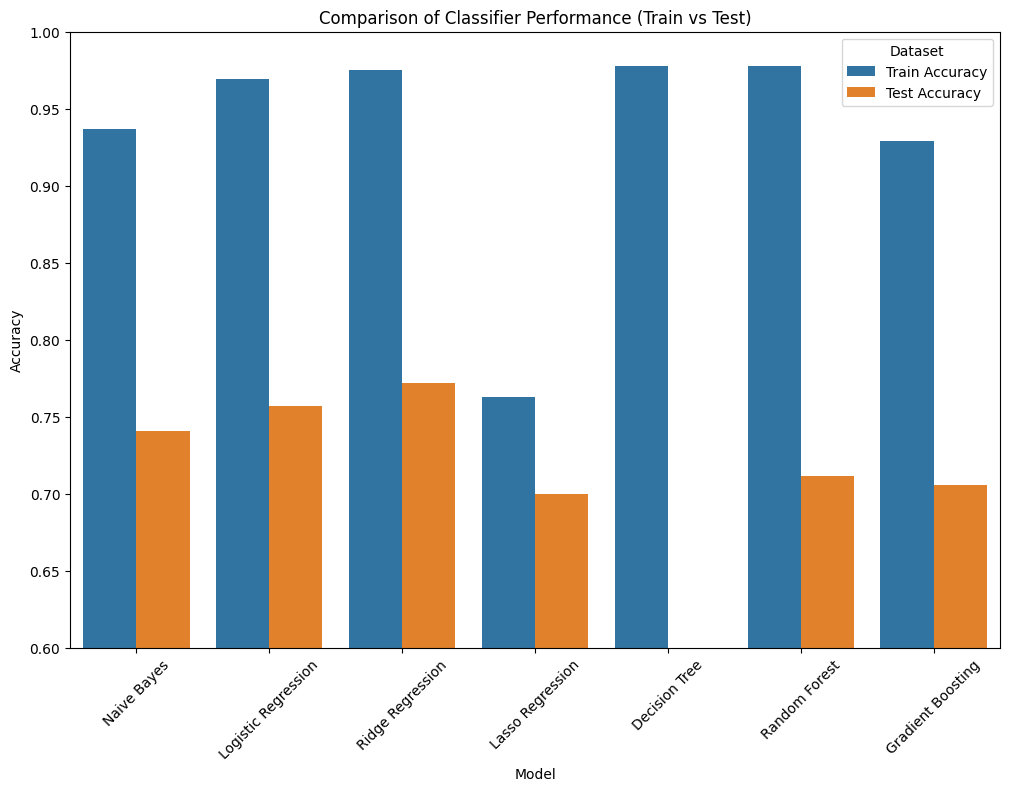

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# Step 1: Text Preprocessing and TF-IDF Vectorization
stop_words = stopwords.words('english')
tfidf = TfidfVectorizer(token_pattern="[a-zA-Z']{3,}",
                        decode_error='ignore',
                        lowercase=True,
                        stop_words=stop_words,
                        ngram_range=(1, 2),  # Use bigrams and unigrams
                        max_df=0.5,
                        min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Step 2: Initialize and Train Models
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    'Ridge Regression': RidgeClassifier(alpha=1.6),
    'Lasso Regression': LogisticRegression(penalty='l1', solver='liblinear', C=1),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Step 3: Collect Performance Metrics
results = {
    'Model': [],
    'Train Accuracy': [],
    'Test Accuracy': []
}

for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)  # Train the model
    train_acc = model.score(X_train_tfidf, y_train)  # Training accuracy
    test_acc = model.score(X_test_tfidf, y_test)  # Test accuracy

    results['Model'].append(model_name)
    results['Train Accuracy'].append(train_acc)
    results['Test Accuracy'].append(test_acc)

# Step 4: Create DataFrame to store results
df_results = pd.DataFrame(results)

# Step 5: Reshape DataFrame for easier plotting
df_melted = df_results.melt(id_vars="Model", value_vars=["Train Accuracy", "Test Accuracy"],
                            var_name="Dataset", value_name="Accuracy")

# Step 6: Plot the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x="Model", y="Accuracy", hue="Dataset", data=df_melted)
plt.title("Comparison of Classifier Performance (Train vs Test)")
plt.ylim(0.6, 1)  # Set y-axis limits if necessary
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()